<a href="https://colab.research.google.com/github/lullabytuls/MachineLearningProject/blob/main/CENG480.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from scipy import stats


Model class

In [ ]:
kclass Model:
  def __init__(self, name, accuracy, f1score, fsmethod):
    self.name = name
    self.accuracy = accuracy
    self.f1score = f1score
    self.fsmethod = fsmethod

# Preprocessing

Feeding Data 

In [ ]:
new_df=pd.read_excel("/content/data_given.xlsx")


###Analyzing the data
---

In [ ]:
new_df.head()

,Transaction ID,TimeOfDay,RestaurantID,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
0,13173,1,R551,4.664509,-74.051383,1,2,2,10.5,29,3000.0,35.0,15000.0,9.615805,1.0,0.000000,6.0,1.0,286,1
1,9151,2,R383,4.719357,-74.036307,1,2,2,7.9,30,2000.0,60.0,15000.0,9.615805,41.0,3.713572,30.0,1.0,253,1
2,16472,2,R688,4.655909,-74.106418,1,1,1,7.4,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,9274,2,R386,4.614621,-74.069801,1,1,2,5.3,16,NaN,45.0,10000.0,9.210340,NaN,NaN,29.0,1.0,0,1
4,4541,1,R191,4.720423,-74.038936,1,2,2,1.5,6,3000.0,45.0,11000.0,9.305651,198.0,5.288267,39.0,1.0,2000,1


In [ ]:
new_df.tail()

,Transaction ID,TimeOfDay,RestaurantID,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
9956,7084,1,R297,4.680535,-74.052056,2,2,1,2.5,5,4000.0,60.0,NaN,NaN,26.0,3.258097,55.0,1.0,1600,1
9957,819,1,R036,4.645276,-74.129669,1,2,2,1.5,6,3900.0,60.0,NaN,NaN,12832.0,9.459697,54.0,1.0,2600,0
9958,674,1,R030,4.695452,-74.030610,2,2,2,3.2,10,3000.0,45.0,15900.0,9.674074,18.0,2.890372,35.0,1.0,938,1
9959,8435,2,R353,4.713154,-74.071395,1,2,2,7.6,20,2000.0,50.0,16000.0,9.680344,35.0,3.555348,30.0,1.0,263,1
9960,13300,1,R556,4.754923,-74.063854,1,1,1,11.7,34,3000.0,35.0,9900.0,9.200290,1.0,0.000000,1.0,1.0,256,1


In [ ]:
new_df.describe()

,Transaction ID,TimeOfDay,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
count,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,7193.000000,9310.000000,8486.000000,8486.000000,7416.000000,6288.000000,9310.000000,9310.000000,9961.000000,9961.000000
mean,9954.488304,1.950607,4.676526,-74.071535,1.310812,1.892180,1.811565,34.882104,123.358599,2578.743223,44.759506,13128.918218,9.357665,189.859628,3.695154,23.523845,0.896133,532.305692,0.966168
std,5784.283423,0.803338,0.044342,0.032134,0.486538,0.510355,0.591889,1225.046161,8105.062391,1420.318910,12.672285,12902.453543,0.436516,736.130660,1.941262,18.479599,0.305104,2781.427582,0.180805
min,1.000000,1.000000,4.470490,-74.221359,1.000000,1.000000,1.000000,0.012000,1.000000,0.000000,5.000000,2000.000000,7.600902,0.000000,0.000000,-53.000000,0.000000,0.000000,0.000000
25%,4892.000000,1.000000,4.646268,-74.090187,1.000000,2.000000,1.000000,3.800000,11.000000,2000.000000,40.000000,9900.000000,9.200290,3.000000,2.302585,12.000000,1.000000,0.000000,1.000000
50%,9930.000000,2.000000,4.677227,-74.061433,1.000000,2.000000,2.000000,7.600000,19.000000,2800.000000,45.000000,10000.000000,9.210340,27.000000,3.713572,25.000000,1.000000,203.000000,1.000000
75%,14978.000000,3.000000,4.710000,-74.049650,2.000000,2.000000,2.000000,12.000000,29.000000,3100.000000,50.000000,15000.000000,9.615805,129.000000,5.164786,36.000000,1.000000,500.000000,1.000000
max,19909.000000,3.000000,4.776851,-74.022591,3.000000,3.000000,10.000000,80000.000000,777778.000000,15000.000000,90.000000,260000.000000,12.468437,12832.000000,9.459697,89.000000,1.000000,241667.000000,1.000000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9961 entries, 0 to 9960
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction ID             9961 non-null   int64  
 1   TimeOfDay                  9961 non-null   int64  
 2   RestaurantID               9961 non-null   object 
 3   RestaurantLatitude         9961 non-null   float64
 4   RestaurantLongitude        9961 non-null   float64
 5   TrafficMorning             9961 non-null   int64  
 6   TrafficNoon                9961 non-null   int64  
 7   TrafficAfternoon           9961 non-null   int64  
 8   DistanceKm                 9961 non-null   float64
 9   TimeMinutes                9961 non-null   int64  
 10  M1DeliveryCost             7193 non-null   float64
 11  M2ExpectedDeliveryTime     9310 non-null   float64
 12  M3MinChargeForOrdering     8486 non-null   float64
 13  M3LogMinChargeForOrdering  8486 non-null   float

###Handling Null Values
--- 

In [ ]:
new_df.isnull().sum().sort_values(ascending=False).head() #datanın ne kadarı null

M4LogNumberOfComments        3673
M1DeliveryCost               2768
M4NumberOfComments           2545
M3LogMinChargeForOrdering    1475
M3MinChargeForOrdering       1475
dtype: int64

Replacing Numeric NaN Values

In [ ]:
for col in new_df:
  if (col == "RestaurantID" or col == "M5Class" or col == "M6Class" or col == "TimeOfDay" or col == "TrafficMorning" or col == "TrafficNoon" or col == "TrafficAfternoon"):
    continue
  else:
    new_df[col].replace(np.nan, new_df[col].mean(), inplace = True)
  
new_df.head()

,Transaction ID,TimeOfDay,RestaurantID,RestaurantLatitude,RestaurantLongitude,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
0,13173,1,R551,4.664509,-74.051383,1,2,2,10.5,29,3000.000000,35.000000,15000.000000,9.615805,1.000000,0.000000,6.000000,1.0,286,1
1,9151,2,R383,4.719357,-74.036307,1,2,2,7.9,30,2000.000000,60.000000,15000.000000,9.615805,41.000000,3.713572,30.000000,1.0,253,1
2,16472,2,R688,4.655909,-74.106418,1,1,1,7.4,17,2578.743223,44.759506,13128.918218,9.357665,189.859628,3.695154,23.523845,NaN,0,1
3,9274,2,R386,4.614621,-74.069801,1,1,2,5.3,16,2578.743223,45.000000,10000.000000,9.210340,189.859628,3.695154,29.000000,1.0,0,1
4,4541,1,R191,4.720423,-74.038936,1,2,2,1.5,6,3000.000000,45.000000,11000.000000,9.305651,198.000000,5.288267,39.000000,1.0,2000,1


In [ ]:
new_df.drop(columns=["RestaurantID", "RestaurantLatitude", "RestaurantLongitude", "Transaction ID "], inplace = True)

In [ ]:
new_df["M5Class"].isnull().sum()

651

Replacing Ordinal and Binary Values

In [ ]:
new_df

,TimeOfDay,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
0,1,1,2,2,10.5,29,3000.000000,35.000000,15000.000000,9.615805,1.000000,0.000000,6.000000,1.0,286,1
1,2,1,2,2,7.9,30,2000.000000,60.000000,15000.000000,9.615805,41.000000,3.713572,30.000000,1.0,253,1
2,2,1,1,1,7.4,17,2578.743223,44.759506,13128.918218,9.357665,189.859628,3.695154,23.523845,NaN,0,1
3,2,1,1,2,5.3,16,2578.743223,45.000000,10000.000000,9.210340,189.859628,3.695154,29.000000,1.0,0,1
4,1,1,2,2,1.5,6,3000.000000,45.000000,11000.000000,9.305651,198.000000,5.288267,39.000000,1.0,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,1,2,2,1,2.5,5,4000.000000,60.000000,13128.918218,9.357665,26.000000,3.258097,55.000000,1.0,1600,1
9957,1,1,2,2,1.5,6,3900.000000,60.000000,13128.918218,9.357665,12832.000000,9.459697,54.000000,1.0,2600,0
9958,1,2,2,2,3.2,10,3000.000000,45.000000,15900.000000,9.674074,18.000000,2.890372,35.000000,1.0,938,1
9959,2,1,2,2,7.6,20,2000.000000,50.000000,16000.000000,9.680344,35.000000,3.555348,30.000000,1.0,263,1


In [ ]:

new_df["M5Class"].replace(np.nan, new_df["M5Class"].median(), inplace = True)
new_df["M6Class"].replace(np.nan, new_df["M6Class"].median(), inplace = True)
new_df["TimeOfDay"].replace(np.nan, new_df["TimeOfDay"].median(), inplace = True)
new_df["TrafficMorning"].replace(np.nan, new_df["TrafficMorning"].median(), inplace = True)
new_df["TrafficNoon"].replace(np.nan, new_df["TrafficNoon"].median(), inplace = True)
new_df["TrafficAfternoon"].replace(np.nan, new_df["TrafficAfternoon"].median(), inplace = True)

new_df = new_df[(np.abs(stats.zscore(new_df[new_df.columns[~new_df.columns.isin(['M5Class','M6Class'])]])) < 3).all(axis=1)].copy()

new_df

,TimeOfDay,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M5DeliveryTimeFulfillment,M5Class,M6DeliveryCostPerKm,M6Class
0,1,1,2,2,10.5,29,3000.000000,35.000000,15000.000000,9.615805,1.000000,0.000000,6.000000,1.0,286,1
1,2,1,2,2,7.9,30,2000.000000,60.000000,15000.000000,9.615805,41.000000,3.713572,30.000000,1.0,253,1
2,2,1,1,1,7.4,17,2578.743223,44.759506,13128.918218,9.357665,189.859628,3.695154,23.523845,1.0,0,1
3,2,1,1,2,5.3,16,2578.743223,45.000000,10000.000000,9.210340,189.859628,3.695154,29.000000,1.0,0,1
4,1,1,2,2,1.5,6,3000.000000,45.000000,11000.000000,9.305651,198.000000,5.288267,39.000000,1.0,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,1,1,3,2,3.4,13,2000.000000,30.000000,10200.000000,9.230143,4.000000,1.386294,17.000000,1.0,588,1
9956,1,2,2,1,2.5,5,4000.000000,60.000000,13128.918218,9.357665,26.000000,3.258097,55.000000,1.0,1600,1
9958,1,2,2,2,3.2,10,3000.000000,45.000000,15900.000000,9.674074,18.000000,2.890372,35.000000,1.0,938,1
9959,2,1,2,2,7.6,20,2000.000000,50.000000,16000.000000,9.680344,35.000000,3.555348,30.000000,1.0,263,1


In [ ]:
new_df.isnull().sum()

TimeOfDay                    0
TrafficMorning               0
TrafficNoon                  0
TrafficAfternoon             0
DistanceKm                   0
TimeMinutes                  0
M1DeliveryCost               0
M2ExpectedDeliveryTime       0
M3MinChargeForOrdering       0
M3LogMinChargeForOrdering    0
M4NumberOfComments           0
M4LogNumberOfComments        0
M5DeliveryTimeFulfillment    0
M5Class                      0
M6DeliveryCostPerKm          0
M6Class                      0
dtype: int64

#Feature Selection
***


#Mutual Information Gain
---

###Mutual Information Gain for M5Class

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

Assigning labels and data to variables

In [ ]:
y = new_df['M5Class']
x = new_df.drop(['M5Class'],axis = 1)
x.drop(['M6Class'], axis = 1, inplace=True)
x.drop(['M5DeliveryTimeFulfillment'], axis = 1, inplace = True)


Splitting data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=100, test_size=0.3)
X_train

,TimeOfDay,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M3LogMinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M6DeliveryCostPerKm
270,2,1,1,1,3.3,7,3000.000000,35.0,9900.000000,9.200290,1.000000,0.000000,909
5955,1,2,2,2,4.9,13,2000.000000,45.0,4400.000000,8.389360,9.000000,2.197225,408
7238,2,2,2,2,0.8,3,2000.000000,45.0,4400.000000,8.389360,9.000000,2.197225,2500
6436,3,1,2,3,7.9,26,3500.000000,45.0,9900.000000,9.200290,327.000000,5.789960,443
7049,2,1,3,2,21.8,1,4000.000000,55.0,15000.000000,9.615805,27.000000,3.295837,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,1,1,1,3.9,13,0.000000,25.0,13128.918218,9.357665,110.000000,4.700480,0
82,3,1,1,1,11.3,33,2578.743223,45.0,10000.000000,9.210340,189.859628,3.695154,0
8510,1,1,2,2,6.4,20,3000.000000,40.0,10900.000000,9.296518,268.000000,5.590987,469
7348,2,2,3,2,4.6,14,2000.000000,45.0,9900.000000,9.200290,28.000000,3.332205,435


Calculating mutual info for every feature

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.        , 0.        , 0.10921153,
       0.13394396, 0.00936375, 0.06325316, 0.010506  , 0.0103654 ,
       0.02330537, 0.02102216, 0.05142586])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

TimeMinutes                  0.133944
DistanceKm                   0.109212
M2ExpectedDeliveryTime       0.063253
M6DeliveryCostPerKm          0.051426
M4NumberOfComments           0.023305
M4LogNumberOfComments        0.021022
M3MinChargeForOrdering       0.010506
M3LogMinChargeForOrdering    0.010365
M1DeliveryCost               0.009364
TimeOfDay                    0.000000
TrafficMorning               0.000000
TrafficNoon                  0.000000
TrafficAfternoon             0.000000
dtype: float64

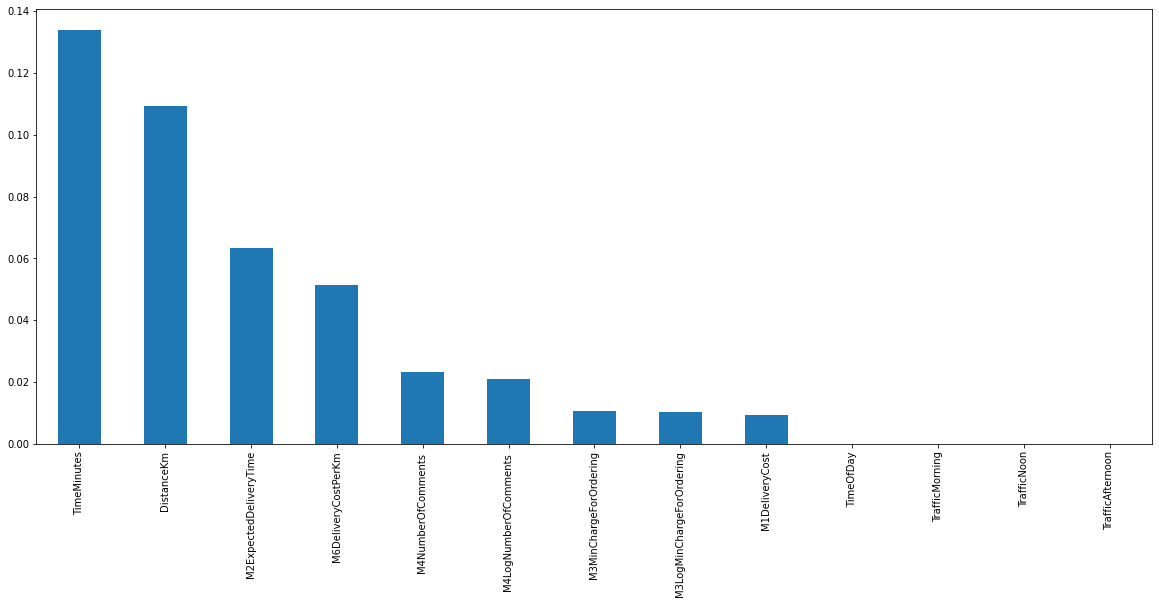

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Feature Selection for M5Class

In [ ]:
from sklearn.feature_selection import SelectKBest

sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['DistanceKm', 'TimeMinutes', 'M2ExpectedDeliveryTime',
       'M4LogNumberOfComments ', 'M6DeliveryCostPerKm'],
      dtype='object')

##Mutual Information Gain for M6Class

In [ ]:
y6 = new_df['M6Class']
X6 = new_df.drop(['M6Class'], axis = 1)
X6.drop(['M5Class'], axis = 1, inplace=True)
X6.drop(['M5DeliveryTimeFulfillment'], axis = 1, inplace = True)

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state = 100, train_size = 0.3)

In [ ]:
mutual_info_6 = mutual_info_classif(X6_train, y6_train)

mutual_info_6 = pd.Series(mutual_info_6)
mutual_info_6.index = X6_train.columns
mutual_info_6.sort_values(ascending=False)

M6DeliveryCostPerKm          0.141553
DistanceKm                   0.087852
TimeMinutes                  0.080575
M1DeliveryCost               0.018331
M2ExpectedDeliveryTime       0.006687
TrafficNoon                  0.006306
M4NumberOfComments           0.005079
M3LogMinChargeForOrdering    0.004743
M3MinChargeForOrdering       0.004158
M4LogNumberOfComments        0.003375
TrafficMorning               0.002662
TimeOfDay                    0.000000
TrafficAfternoon             0.000000
dtype: float64

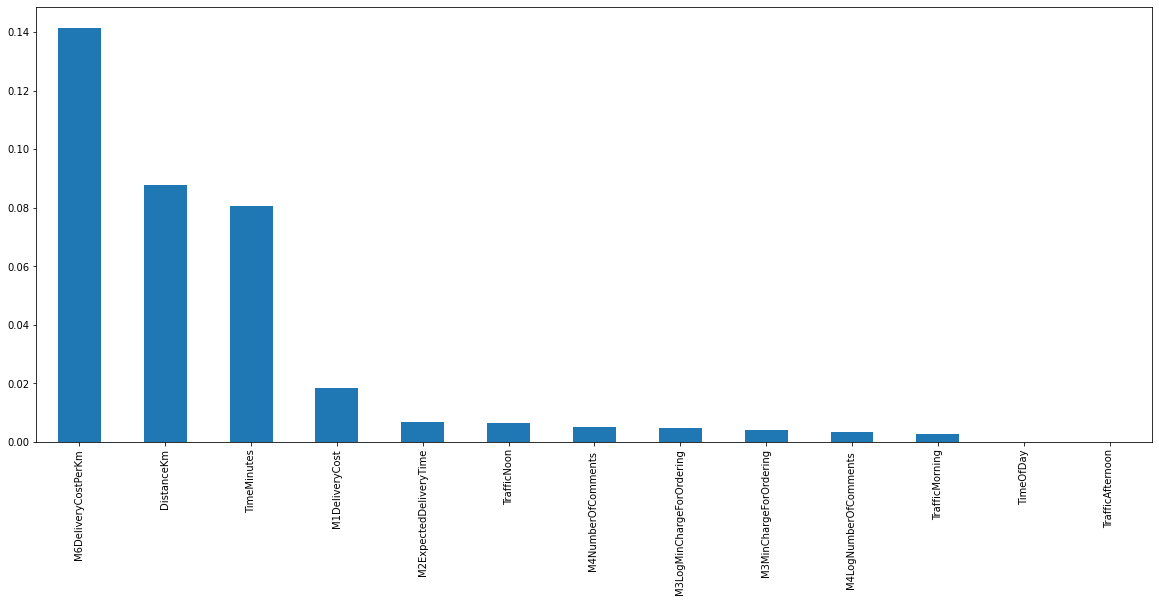

In [ ]:
mutual_info_6.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Feature Selection for M6Class

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X6_train, y6_train)
X6_train.columns[sel_five_cols.get_support()]

Index(['DistanceKm', 'TimeMinutes', 'M1DeliveryCost', 'M2ExpectedDeliveryTime',
       'M6DeliveryCostPerKm'],
      dtype='object')

#Pearson Correlation Feature Selection
---


For M5 Class


In [ ]:
X1 = new_df.drop(labels=['M5Class'],axis=1) 
y1=new_df['M5Class']
X1.drop(['M6Class', 'M5DeliveryTimeFulfillment'], axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, random_state = 0, test_size = 0.3
)

print(X1_train.shape)
print(X1_test.shape)



(6578, 13)
(2820, 13)


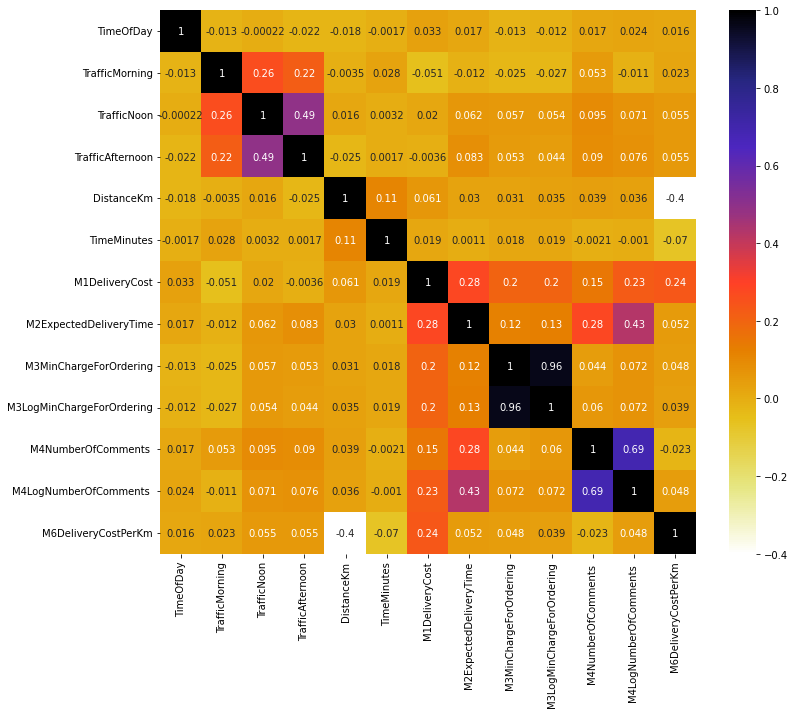

In [ ]:
#Using Pearson Correlation

import seaborn as sns

plt.figure(figsize=(12,10))
cor= X1_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix= dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])> threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X1_train, 0.7)
len(set(corr_features))

1

In [ ]:
corr_features


{'M3LogMinChargeForOrdering'}

In [ ]:
X1_train = X1_train.drop(corr_features, axis=1)
X1_test = X1_test.drop(corr_features, axis=1)
len(X1_train.columns)

12

In [ ]:
X1_train

,TimeOfDay,TrafficMorning,TrafficNoon,TrafficAfternoon,DistanceKm,TimeMinutes,M1DeliveryCost,M2ExpectedDeliveryTime,M3MinChargeForOrdering,M4NumberOfComments,M4LogNumberOfComments,M6DeliveryCostPerKm
9127,1,2,2,2,4.8,15,3500.000000,75.000000,20000.000000,314.000000,5.749393,729
1963,3,1,2,1,19.5,48,3500.000000,30.000000,13128.918218,146.000000,4.983607,179
4919,1,1,2,2,12.9,36,2578.743223,44.759506,13128.918218,189.859628,3.695154,0
3260,2,1,2,2,18.2,47,2000.000000,25.000000,10000.000000,13.000000,2.564949,110
4975,2,1,2,2,15.7,44,2578.743223,55.000000,20000.000000,8.000000,2.079442,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8358,2,1,1,1,10.5,29,2578.743223,44.759506,13128.918218,189.859628,3.695154,0
9782,3,1,1,1,13.0,33,2000.000000,55.000000,11900.000000,14.000000,2.639057,154
5153,1,1,2,2,13.3,31,2000.000000,45.000000,15000.000000,6.000000,1.791759,150
3458,2,1,2,1,4.6,17,3500.000000,40.000000,10000.000000,18.000000,2.890372,761


For M6 Class

In [ ]:
X2 = new_df.drop(labels=['M6Class'],axis=1)
y2=new_df['M6Class']
X2.drop(['M5Class', 'M5DeliveryTimeFulfillment'], axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, random_state = 0, test_size = 0.3
)

print(X2_train.shape)
print(X2_test.shape)

(6578, 13)
(2820, 13)


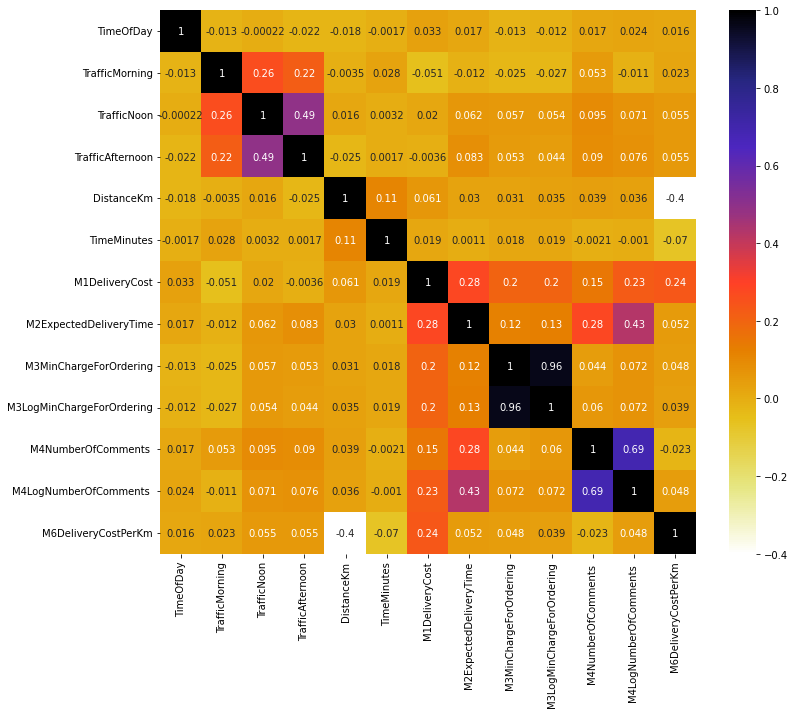

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10))
corr= X2_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix= dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])> threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features2 = correlation(X2_train, 0.7)
len(set(corr_features2))

1

In [ ]:
corr_features2

{'M3LogMinChargeForOrdering'}

Highly correlated columns are eliminated

In [ ]:
X2_train = X2_train.drop(corr_features2, axis=1)
X2_test = X2_test.drop(corr_features2, axis=1)
len(X2_train.columns)

12

#Applying Prediction Models
---

##Model Training based on Correlation
---


Creating M5 and M6 lists to hold all models. These lists will help to determine the best models for the predictions

In [ ]:
M5 = []
M6 = []

###Predicting M5Class

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve   
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)
y_pred = knn.predict(X1_test)
print('Accuracy:', metrics.accuracy_score(y1_test,y_pred))
	
print('F1 Score: %.3f' % f1_score(y1_test, y_pred))
M5.append(Model("KNN", metrics.accuracy_score(y1_test,y_pred), f1_score(y1_test, y_pred), "Correlation"))

Accuracy: 0.9400709219858157
F1 Score: 0.967


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X1_train, y1_train)
y_pred = gnb.predict(X1_test)
print('Accuracy:', metrics.accuracy_score(y1_test,y_pred))
	
print('F1 Score: %.3f' % f1_score(y1_test, y_pred))
M5.append(Model("Gaussian", metrics.accuracy_score(y1_test,y_pred), f1_score(y1_test, y_pred), "Correlation"))

Accuracy: 0.824468085106383
F1 Score: 0.894


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X1_train, y1_train)
y_pred = reg.predict(X1_test)

print('Accuracy:', metrics.accuracy_score(y1_test,y_pred))
print('F1 Score: %.3f' % f1_score(y1_test, y_pred))
M5.append(Model("Logistic Regression", metrics.accuracy_score(y1_test,y_pred), f1_score(y1_test, y_pred), "Correlation"))

Accuracy: 0.926950354609929
F1 Score: 0.961


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.999645390070922
F1 Score: 0.999805


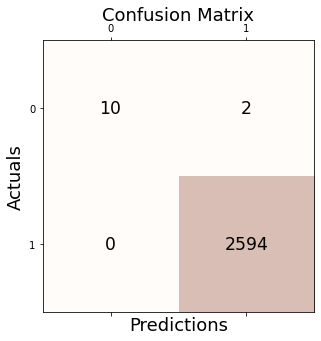

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X1_train, y1_train)
y_pred = dtc.predict(X1_test)

print('Accuracy:', metrics.accuracy_score(y1_test,y_pred))
print('F1 Score: %f' % f1_score(y1_test, y_pred))
M5.append(Model("Decision Tree", metrics.accuracy_score(y1_test,y_pred), f1_score(y1_test, y_pred), "Correlation"))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X1_train, y1_train)
y_pred = rfc.predict(X1_test)

print('Accuracy:', metrics.accuracy_score(y1_test,y_pred))
print('F1 Score: %.3f' % f1_score(y1_test, y_pred))
M5.append(Model("Random Forest", metrics.accuracy_score(y1_test,y_pred), f1_score(y1_test, y_pred), "Correlation"))

Accuracy: 0.9900709219858156
F1 Score: 0.995


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X1_train, y1_train)
y_pred = svc.predict(X1_test)

print('Accuracy:', metrics.accuracy_score(y1_test,y_pred))
print('F1 Score: %.3f' % f1_score(y1_test, y_pred))
M5.append(Model("SVC", metrics.accuracy_score(y1_test,y_pred), f1_score(y1_test, y_pred), "Correlation"))

Accuracy: 0.9078014184397163
F1 Score: 0.952


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Convert the data to XGBoost's internal format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {
    'max_depth': 3,  # Maximum depth of the tree
    'eta': 0.1,  # Learning rate
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'error'  # Evaluation metric
}

# Train the model
num_round = 10  # Number of rounds of training
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the test set
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds.round())
print("Accuracy for M5Class: {:.2f}".format(accuracy))
M5.append(Model("XGBOOST", metrics.accuracy_score(y1_test,y_pred), f1_score(y1_test, y_pred), "Correlation"))


Accuracy for M5Class: 0.98


###Predicting M6Class


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve   


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)
y_pred = knn.predict(X2_test)
print('Accuracy:', metrics.accuracy_score(y2_test,y_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y_pred))
M6.append(Model("KNN", metrics.accuracy_score(y2_test,y_pred), f1_score(y2_test, y_pred), "Correlation"))

Accuracy: 0.9960992907801418
F1 Score: 0.998


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X2_train, y2_train)
y_pred = gnb.predict(X2_test)
print('Accuracy:', metrics.accuracy_score(y2_test,y_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y_pred))
M6.append(Model("Gaussian", metrics.accuracy_score(y2_test,y_pred), f1_score(y2_test, y_pred), "Correlation"))

Accuracy: 0.975886524822695
F1 Score: 0.987


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
model.fit(X2_train, y2_train)

# Make predictions on the test data
predictions = model.predict(X2_test)

# Evaluate the model's performance

print('Accuracy:', metrics.accuracy_score(y2_test,y_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y_pred))
M6.append(Model("Random Forest", metrics.accuracy_score(y2_test,y_pred), f1_score(y2_test, y_pred), "Correlation"))

Accuracy: 0.975886524822695
F1 Score: 0.987


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X2_train, y2_train)
y_pred = reg.predict(X2_test)

print('Accuracy:', metrics.accuracy_score(y2_test,y_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y_pred))
M6.append(Model("Logistic Regression", metrics.accuracy_score(y2_test,y_pred), f1_score(y2_test, y_pred), "Correlation"))

Accuracy: 0.9968085106382979
F1 Score: 0.998


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X2_train, y2_train)
y_pred = dtc.predict(X2_test)

print('Accuracy:', metrics.accuracy_score(y2_test,y_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y_pred))
M6.append(Model("Decision Tree", metrics.accuracy_score(y2_test,y_pred), f1_score(y2_test, y_pred), "Correlation"))

Accuracy: 1.0
F1 Score: 1.000


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X2_train, y2_train)
y_pred = svc.predict(X2_test)

print('Accuracy:', metrics.accuracy_score(y2_test,y_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y_pred))
M6.append(Model("SVC", metrics.accuracy_score(y2_test,y_pred), f1_score(y2_test, y_pred), "Correlation"))

Accuracy: 0.9939716312056738
F1 Score: 0.997


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Convert the data to XGBoost's internal format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {
    'max_depth': 3,  # Maximum depth of the tree
    'eta': 0.1,  # Learning rate
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'error'  # Evaluation metric
}

# Train the model
num_round = 10  # Number of rounds of training
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the test set
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds.round())
print("Accuracy for M6Class: {:.2f}".format(accuracy))
print('F1 Score: %.3f' % f1_score(y2_test, y_pred))
M6.append(Model("XGBOOST", metrics.accuracy_score(y2_test,y_pred), f1_score(y2_test, y_pred), "Correlation"))


Accuracy for M6Class: 1.00
F1 Score: 0.997


##Model Training Based on Mutual Information Gain
---

Setting training and testing sets

In [ ]:
X5 = new_df[['DistanceKm', 'TimeMinutes', 'M2ExpectedDeliveryTime',
       'M4LogNumberOfComments ', 'M6DeliveryCostPerKm']] 
y5 = new_df.M5Class
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=1)


XM6 = new_df[['DistanceKm', 'TimeMinutes', 'M1DeliveryCost', 'M4LogNumberOfComments ',
       'M6DeliveryCostPerKm']]
yM6 = new_df["M6Class"]

XM6_train, XM6_test, yM6_train, yM6_test = train_test_split(XM6, yM6, test_size=0.3, random_state=1)


###Predicting M5Class

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve   
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X5_train, y5_train)
y_pred = knn.predict(X5_test)
print('Accuracy:', metrics.accuracy_score(y5_test,y_pred))
print('F1 Score: %.3f' % f1_score(y5_test, y_pred))
M5.append(Model("KNN", metrics.accuracy_score(y5_test,y_pred), f1_score(y5_test, y_pred), "MIG"))

Accuracy: 0.9826241134751773
F1 Score: 0.990


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X5_train, y5_train)
y_pred = gnb.predict(X5_test)
print('Accuracy:', metrics.accuracy_score(y5_test,y_pred))
print('F1 Score: %.3f' % f1_score(y5_test, y_pred))
M5.append(Model("Gaussian", metrics.accuracy_score(y5_test,y_pred), f1_score(y5_test, y_pred), "MIG"))

Accuracy: 0.7223404255319149
F1 Score: 0.820


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X5_train, y5_train)
y_pred = rfc.predict(X5_test)

print('Accuracy:', metrics.accuracy_score(y5_test,y_pred))
print('F1 Score: %.3f' % f1_score(y5_test, y_pred))
M5.append(Model("Random Forest", metrics.accuracy_score(y5_test,y_pred), f1_score(y5_test, y_pred), "MIG"))

Accuracy: 0.9975177304964539
F1 Score: 0.999


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X5_train, y5_train)
y_pred = reg.predict(X5_test)

print('Accuracy:', metrics.accuracy_score(y5_test,y_pred))
print('F1 Score: %.3f' % f1_score(y5_test, y_pred))
M5.append(Model("Logistic Regression", metrics.accuracy_score(y5_test,y_pred), f1_score(y5_test, y_pred), "MIG"))

Accuracy: 0.9351063829787234
F1 Score: 0.965


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X5_train, y5_train)
y_pred = dtc.predict(X5_test)

print('Accuracy:', metrics.accuracy_score(y5_test,y_pred))
print('F1 Score: %f' % f1_score(y5_test, y_pred))
M5.append(Model("Decision Tree", metrics.accuracy_score(y5_test,y_pred), f1_score(y5_test, y_pred), "MIG"))

conf_matrix = confusion_matrix(y_true=y5_test, y_pred=y_pred)


Accuracy: 0.999645390070922
F1 Score: 0.999805


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X5_train, y5_train)
y_pred = svc.predict(X5_test)

print('Accuracy:', metrics.accuracy_score(y5_test,y_pred))
print('F1 Score: %.3f' % f1_score(y5_test, y_pred))
M5.append(Model("SVC", metrics.accuracy_score(y5_test,y_pred), f1_score(y5_test, y_pred), "MIG"))

Accuracy: 0.9088652482269504
F1 Score: 0.952


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Convert the data to XGBoost's internal format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {
    'max_depth': 3,  # Maximum depth of the tree
    'eta': 0.1,  # Learning rate
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'error'  # Evaluation metric
}

# Train the model
num_round = 10  # Number of rounds of training
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the test set
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds.round())
print("Accuracy for M5Class: {:.2f}".format(accuracy))
print('F1 Score: %.3f' % f1_score(y5_test, y_pred))
M5.append(Model("XGBOOST", metrics.accuracy_score(y5_test,y_pred), f1_score(y5_test, y_pred), "MIG"))


Accuracy for M5Class: 0.98
F1 Score: 0.952


###Predicting M6Class

Accuracy: 0.999645390070922
F1 Score: 0.999818


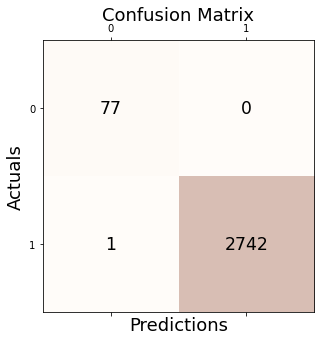

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve   


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(XM6_train, yM6_train)
y_pred = knn.predict(XM6_test)
print('Accuracy:', metrics.accuracy_score(yM6_test,y_pred))
print('F1 Score: %f' % f1_score(yM6_test, y_pred))
M6.append(Model("KNN", metrics.accuracy_score(yM6_test,y_pred), f1_score(yM6_test, y_pred), "MIG"))

conf_matrix = confusion_matrix(y_true=yM6_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(XM6_train, yM6_train)
y_pred = gnb.predict(XM6_test)
print('Accuracy:', metrics.accuracy_score(yM6_test,y_pred))
print('F1 Score: %.3f' % f1_score(yM6_test, y_pred))
M6.append(Model("Gaussian", metrics.accuracy_score(yM6_test,y_pred), f1_score(yM6_test, y_pred), "MIG"))

Accuracy: 0.9762411347517731
F1 Score: 0.988


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(XM6_train, yM6_train)
y_pred = rfc.predict(XM6_test)

print('Accuracy:', metrics.accuracy_score(yM6_test,y_pred))
print('F1 Score: %.3f' % f1_score(yM6_test, y_pred))
M6.append(Model("Random Forest", metrics.accuracy_score(yM6_test,y_pred), f1_score(yM6_test, y_pred), "MIG"))

Accuracy: 1.0
F1 Score: 1.000


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(XM6_train, yM6_train)
y_pred = reg.predict(XM6_test)

print('Accuracy:', metrics.accuracy_score(yM6_test,y_pred))
print('F1 Score: %.3f' % f1_score(yM6_test, y_pred))
M6.append(Model("Logistic Regression", metrics.accuracy_score(yM6_test,y_pred), f1_score(yM6_test, y_pred), "MIG"))

Accuracy: 0.9989361702127659
F1 Score: 0.999


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(XM6_train, yM6_train)
y_pred = dtc.predict(XM6_test)

print('Accuracy:', metrics.accuracy_score(yM6_test,y_pred))
print('F1 Score: %.3f' % f1_score(yM6_test, y_pred))
M6.append(Model("Decision Tree", metrics.accuracy_score(yM6_test,y_pred), f1_score(yM6_test, y_pred), "MIG"))

Accuracy: 1.0
F1 Score: 1.000


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(XM6_train, yM6_train)
y_pred = svc.predict(XM6_test)

print('Accuracy:', metrics.accuracy_score(yM6_test,y_pred))
print('F1 Score: %.3f' % f1_score(yM6_test, y_pred))
M6.append(Model("SVC", metrics.accuracy_score(yM6_test,y_pred), f1_score(yM6_test, y_pred), "MIG"))

Accuracy: 1.0
F1 Score: 1.000


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(XM6, yM6, test_size=0.2, random_state=42)

# Convert the data to XGBoost's internal format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the model
param = {
    'max_depth': 3,  # Maximum depth of the tree
    'eta': 0.1,  # Learning rate
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'error'  # Evaluation metric
}

# Train the model
num_round = 10  # Number of rounds of training
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the test set
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds.round())
print("Accuracy for M6Class: {:.2f}".format(accuracy))
M6.append(Model("XGBOOST", metrics.accuracy_score(yM6_test,y_pred), f1_score(yM6_test, y_pred), "MIG"))


Accuracy for M6Class: 1.00


Best models for M5Class and M6Class

In [ ]:
mask1 = new_df[['M5Class']].eq(1)
mask2 = new_df[['M5Class']].eq(0)
# Count the number of 'True' values in the mask
count1 = mask1.sum().sum()
count0 = mask2.sum().sum()

print("M5Class----")
print("Number of 1's : " + str(count1))
print("Number of 0's : " + str(count0))

mask6 = new_df[['M6Class']].eq(1)
mask7 = new_df[['M6Class']].eq(0)
# Count the number of 'True' values in the mask
count1 = mask6.sum().sum()
count0 = mask7.sum().sum()
print()
print("M6Class----")
print("Number of 1's : " + str(count1))
print("Number of 0's : " + str(count0))

M5Class----
Number of 1's : 8495
Number of 0's : 903

M6Class----
Number of 1's : 9136
Number of 0's : 262


In [ ]:
print("Correlation Feature Selection For M5Class")
print()
print ("{:<20} {:<20} {:<10}".format('Name','Accuracy','F1Score'))
for i in M5:
  if(i.fsmethod == "Correlation"):
    print ("{:<20} {:<20} {:<10}".format(i.name, i.accuracy, i.f1score))

print()
print("Correlation Feature Selection For M6Class")
print()
print ("{:<20} {:<20} {:<10}".format('Name','Accuracy','F1Score'))
for i in M6:
  if(i.fsmethod == "Correlation"):
    print ("{:<20} {:<20} {:<10}".format(i.name, i.accuracy, i.f1score))

print()
print("Mutual Information Gain For M5Class")
print()
print ("{:<20} {:<20} {:<10}".format('Name','Accuracy','F1Score'))
for i in M5:
  if(i.fsmethod == "MIG"):
    print ("{:<20} {:<20} {:<10}".format(i.name, i.accuracy, i.f1score))

print()
print("Mutual Information Gain For M6Class")
print()
print ("{:<20} {:<20} {:<10}".format('Name','Accuracy','F1Score'))
for i in M6:
  if(i.fsmethod == "MIG"):
    print ("{:<20} {:<20} {:<10}".format(i.name, i.accuracy, i.f1score))

Correlation Feature Selection For M5Class

Name                 Accuracy             F1Score   
KNN                  0.9400709219858157   0.9673556113579294
Gaussian             0.824468085106383    0.8938906752411575
Logistic Regression  0.926950354609929    0.9605363984674329
Decision Tree        0.999645390070922    0.9998046493455753
Random Forest        0.9900709219858156   0.9945482866043613
SVC                  0.9078014184397163   0.9516728624535316
XGBOOST              0.9078014184397163   0.9516728624535316

Correlation Feature Selection For M6Class

Name                 Accuracy             F1Score   
KNN                  0.9960992907801418   0.9979916012415555
Gaussian             0.975886524822695    0.9874074074074074
Random Forest        0.975886524822695    0.9874074074074074
Logistic Regression  0.9968085106382979   0.998354962529702
Decision Tree        1.0                  1.0       
SVC                  0.9939716312056738   0.9968995075688492
XGBOOST              0.